In [147]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [148]:
training_df = pd.read_csv('data/train_df.csv')
test_df = pd.read_csv('data/test_df.csv')


In [149]:
training_df


,search_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,target
0,758,9,0,0,1,20,3,40,0,3,...,0.204682,0.271755,0.055623,0,0,0,0.38648,0.0,0.0,0
1,758,9,0,0,1,20,3,40,0,3,...,0.195531,0.188787,0.036914,0,0,0,0.10982,0.0,0.0,0
2,758,9,0,0,1,20,3,40,0,3,...,0.148609,0.186517,0.027718,0,0,0,0.03674,0.0,0.0,0
3,758,9,0,0,1,20,3,40,0,3,...,0.223748,0.229039,0.051247,0,0,0,0.00000,0.0,0.0,0
4,758,9,0,0,1,20,3,40,0,3,...,0.170935,0.249031,0.042568,0,0,0,0.00000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15076,494693,9,0,0,0,9,4,38,6,6,...,0.309672,0.921060,0.285226,0,0,0,0.98807,0.0,0.0,0
15077,494693,9,0,0,0,9,4,38,6,6,...,0.303805,0.995086,0.302312,0,0,0,0.87146,0.0,0.0,0
15078,494693,9,0,0,0,9,4,38,6,6,...,0.346538,0.993070,0.344137,0,0,0,0.49999,0.0,0.0,0
15079,494693,9,0,0,0,9,4,38,6,6,...,0.243154,0.994833,0.241898,0,0,0,0.67614,0.0,0.0,0


In [150]:
y = training_df['target']
X = training_df.drop(['target', 'search_id'], axis=1)


In [151]:
X.isnull().sum()

feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
             ..
feature_74    0
feature_75    0
feature_76    0
feature_77    0
feature_78    0
Length: 79, dtype: int64

In [152]:
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, precision_recall_curve, f1_score, PrecisionRecallDisplay
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

In [154]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

ROC-AUC Score: 0.6813413171297662
Accuracy: 0.974477958236659
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2948
           1       0.00      0.00      0.00        69

    accuracy                           0.97      3017
   macro avg       0.49      0.50      0.49      3017
weighted avg       0.95      0.97      0.96      3017



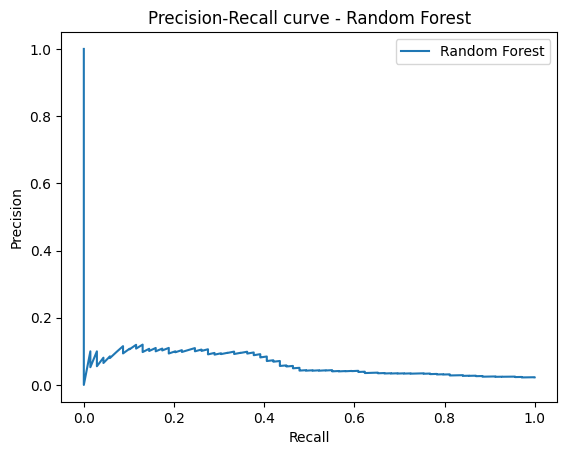

In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt


rf_model = RandomForestClassifier(class_weight='balanced', random_state=42, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100)
rf_model.fit(X_train, y_train)


y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
y_pred_rf = rf_model.predict(X_test)

roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"ROC-AUC Score: {roc_auc_rf}")


accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf}")
print(classification_report(y_test, y_pred_rf))


precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_proba_rf)
plt.plot(recall_rf, precision_rf, label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve - Random Forest')
plt.legend()
plt.show()


In [156]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200, 300], # Number of trees in the forest
    'max_depth': [10, 20, 30],       # Maximum depth of the trees
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],   # Minimum number of samples required at a leaf node

}

rf = RandomForestClassifier(class_weight='balanced', random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='f1_macro', verbose=2)

grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Use the best estimator to predict on the test set
y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the best model from grid search
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   6.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   6.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   6.4s
[CV] END max_depth=10, min_sa

In [157]:
from sklearn.metrics import precision_recall_curve

# Get the probability predictions for the minority class
y_scores = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

# Calculate precision and recall for various thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

fscores = (2 * precisions * recalls) / (precisions + recalls + 1e-10)
best_f1_index = np.argmax(fscores)
best_threshold = thresholds[best_f1_index]
best_f1_score = fscores[best_f1_index]

print(f"Best threshold: {best_threshold}")
print(f"Best F1 Score: {best_f1_score}")

y_pred_adjusted = (y_scores >= best_threshold).astype(int)


print(f"Adjusted Accuracy: {accuracy_score(y_test, y_pred_adjusted)}")
print(classification_report(y_test, y_pred_adjusted))


Best threshold: 0.3599665089640507
Best F1 Score: 0.15189873412801633
Adjusted Accuracy: 0.9555850182300298
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2948
           1       0.13      0.17      0.15        69

    accuracy                           0.96      3017
   macro avg       0.56      0.57      0.56      3017
weighted avg       0.96      0.96      0.96      3017



In [158]:
import pandas as pd
import numpy as np
y_final_test = test_df['target']
X_final_test = test_df.drop(['target', 'search_id'], axis=1)
y_scores_final_test = grid_search.best_estimator_.predict_proba(X_final_test)[:, 1]
ranked_test_df = test_df.loc[:]

ranked_test_df['predictions'] = y_scores_final_test


ranked_test_df['rank'] = ranked_test_df.groupby('search_id')['predictions'].rank(ascending=False, method='first')


def calculate_ndcg(df, k=None):
    """Calculate normalized discounted cumulative gain at k for each group of search_id."""
    def dcg_at_k(rel, k):
        """Discounted cumulative gain at k."""
        rel = np.asfarray(rel)[:k] if k is not None else np.asfarray(rel)
        if rel.size:
            discounts = np.log2(np.arange(2, len(rel) + 2))
            return np.sum(rel / discounts)
        return 0

    def ndcg_at_k(rel_true, rel_pred, k):
        """Normalized discounted cumulative gain at k."""
        idcg = dcg_at_k(sorted(rel_true, reverse=True), k)
        if not idcg:
            return 0.
        return dcg_at_k(rel_pred, k) / idcg
    

    ndcg_scores = df.groupby('search_id').apply(
        lambda g: ndcg_at_k(
            g['target'].values,  
            g['predictions'].values, 
            k  
        )
    )
    return ndcg_scores

ndcg_scores = calculate_ndcg(ranked_test_df, k=5)  
overall_ndcg = ndcg_scores.mean() 
print(f"Overall nDCG@5 score: {overall_ndcg}")


Overall nDCG@5 score: 0.08309386377134809


/tmp/ipykernel_1642/3314472771.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ndcg_scores = df.groupby('search_id').apply(
